In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
x = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(x).ravel()
y += 0.2 * np.random.randn(len(y))



In [2]:

def RegTree(x,y,maxdepth,):
    regression_tree = DecisionTreeRegressor(max_depth=maxdepth,random_state=42)
    regression_tree.fit(x, y)

    X_test = np.linspace(x.min(),x.max(),x.shape[0])
    y_pred = regression_tree.predict(X_test.reshape(-1,1))

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, s=20, edgecolor="black", c="darkorange",)
    plt.plot(X_test, y_pred, color="cornflowerblue",)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.show()

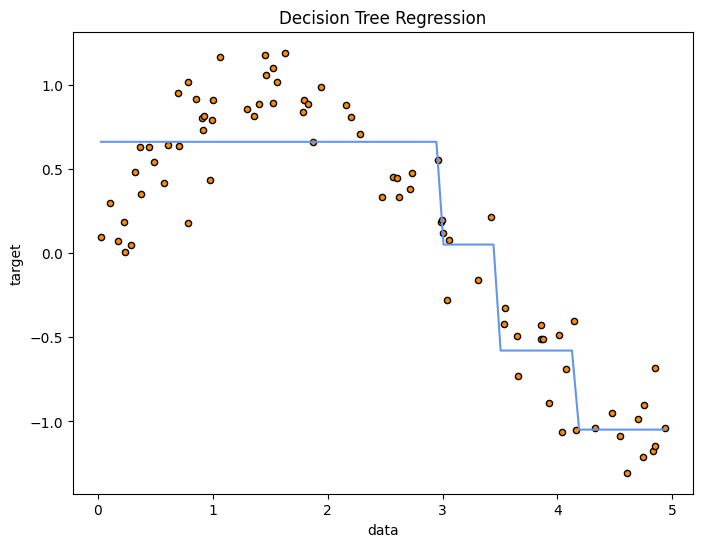

In [3]:
RegTree(x,y,maxdepth=2)


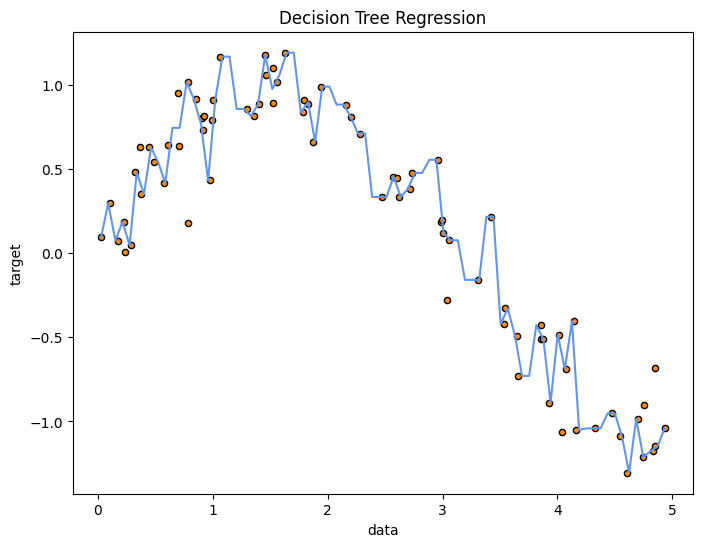

In [4]:
RegTree(x,y,maxdepth=10)



In [6]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [8]:
df = pd.read_csv("./boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
df.shape

X = df.iloc[:,0:13]
y = df.iloc[:,13]


(506, 14)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [14]:
rt = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth=5)


In [15]:
rt.fit(X_train,y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [16]:
y_pred = rt.predict(X_test)


In [17]:
r2_score(y_test,y_pred)


0.7937140365309365

In [21]:

param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['friedman_mse','squared_error'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [22]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)


In [23]:
reg.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [24]:
reg.best_score_


0.6545092256177486

In [25]:
reg.best_params_


{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 0.5,
 'min_samples_split': 0.25}

In [26]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
  print (name, importance)

RM 0.6292222501550522
LSTAT 0.21601920392916502
DIS 0.07187288650018557
CRIM 0.05220097413927113
B 0.011905660139828148
AGE 0.007025459165410524
PTRATIO 0.004391097507128522
NOX 0.0035610403857027108
INDUS 0.0026274687266822816
CHAS 0.0011739593515739197
ZN 0.0
TAX 0.0
RAD 0.0
